<a href="https://colab.research.google.com/github/rupali-01/DEEP-LEARNING/blob/main/HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HR**



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
df1 = pd.read_csv(list(uploaded.keys())[0])
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work).

Plot bar charts showing impact of employee salaries on retention.

Plot bar charts showing corelation between department and employee retention.

Now build logistic regression model using variables that were narrowed down in step 1.

Measure the accuracy of the model

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

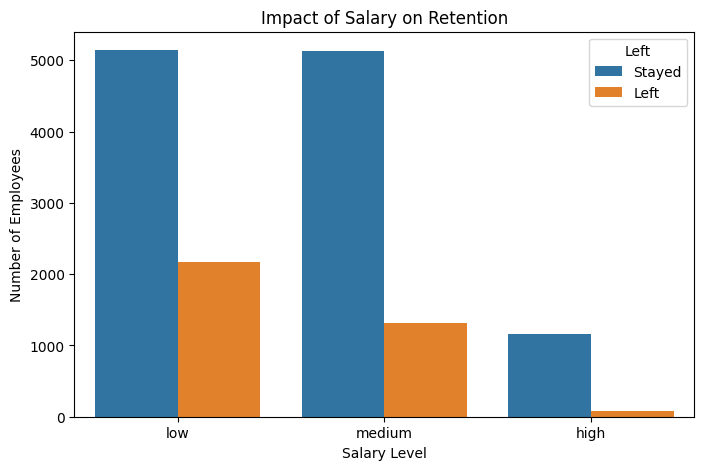

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x='salary', hue='left')
plt.title("Impact of Salary on Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

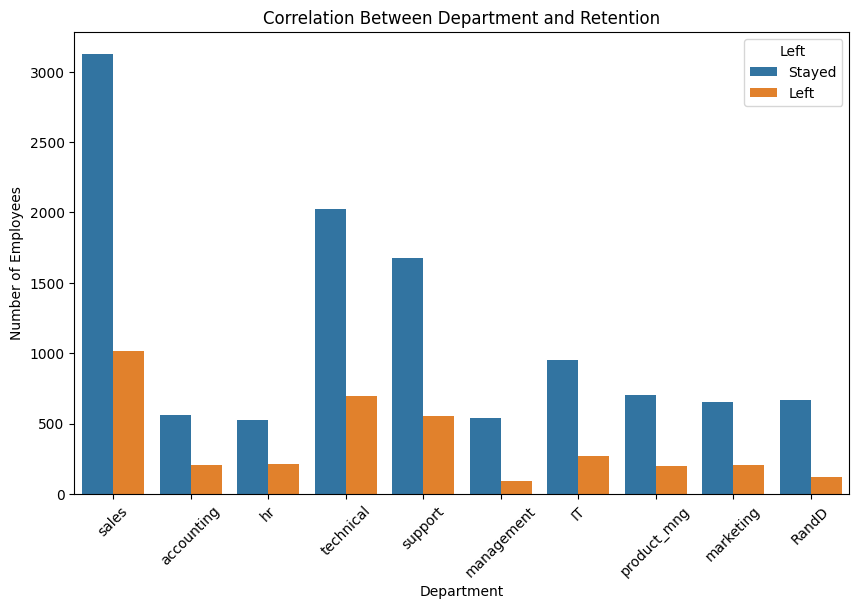

In [ ]:
# Plot department vs retention
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Department', hue='left')
plt.title("Correlation Between Department and Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()


In [ ]:
label_encoder = LabelEncoder()
df1['salary'] = label_encoder.fit_transform(df1['salary'])
df1['Department'] = label_encoder.fit_transform(df1['Department'])

In [ ]:
print("\nData Types After Encoding:\n", df1.dtypes)


Data Types After Encoding:
 satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int64
salary                     int64
dtype: object


In [ ]:
correlation_matrix = df1.select_dtypes(include=['float64', 'int64']).corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                        satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
Department                       0.003153         0.007772        0.009268   
salary                           0.011754         0.013965        0.009672   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048         

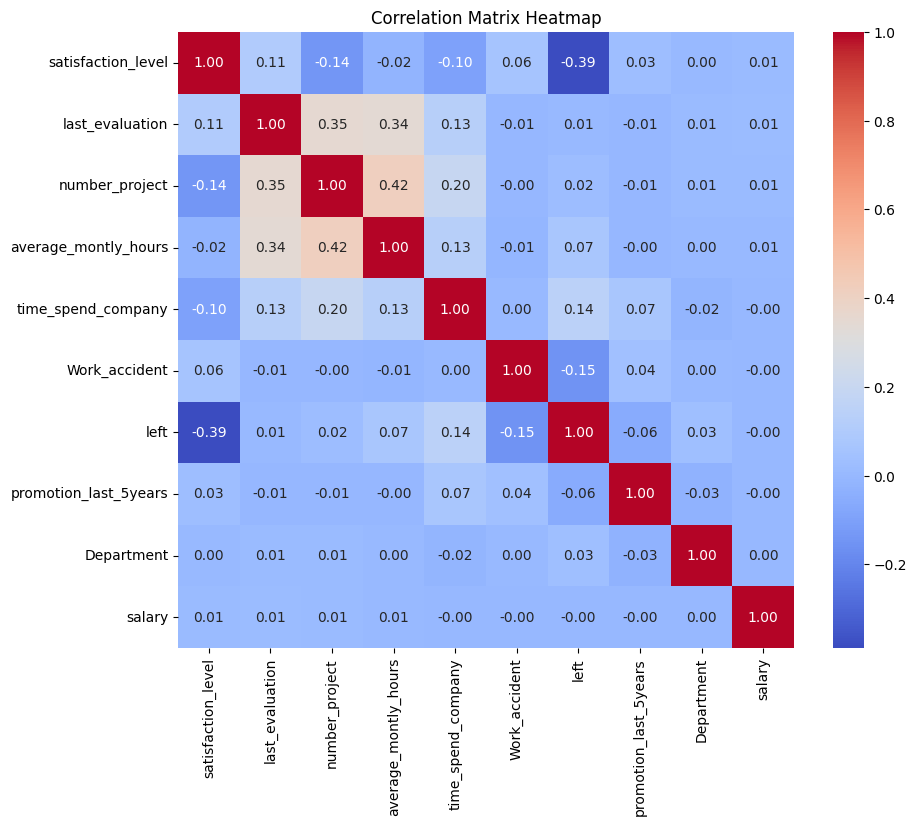

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X = df1[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary', 'Department']]
y = df1['left']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department
12602,0.10,0.84,7,250,4,0,0,1,6
4889,0.57,0.68,4,154,3,1,0,2,4
1572,0.39,0.48,2,154,3,0,0,1,9
13375,0.91,0.68,4,132,4,0,0,2,0
879,0.82,0.97,5,263,5,0,0,2,9
...,...,...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0,1,8
13418,0.49,0.65,4,233,7,0,0,2,7
5390,0.66,0.73,5,249,2,0,0,2,8
860,0.79,1.00,4,218,5,0,0,1,7


In [ ]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department
6723,0.65,0.96,5,226,2,1,0,2,5
6473,0.88,0.80,3,166,2,0,0,1,0
4679,0.69,0.98,3,214,2,0,0,1,7
862,0.41,0.47,2,154,3,0,0,1,7
7286,0.87,0.76,5,254,2,1,0,1,3
...,...,...,...,...,...,...,...,...,...
13388,0.85,0.81,4,260,3,0,0,2,6
10463,0.21,0.43,2,249,3,0,0,1,5
5331,0.78,0.53,3,156,3,0,0,1,6
7499,0.93,0.58,5,238,2,0,0,2,7


In [ ]:
y_test

,left
6723,0
6473,0
4679,0
862,1
7286,0
...,...
13388,0
10463,0
5331,0
7499,0


In [ ]:
y_train

,left
12602,1
4889,0
1572,1
13375,0
879,1
...,...
5191,0
13418,0
5390,0
860,1


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Model Accuracy: 76.04%

Confusion Matrix:
 [[3167  261]
 [ 817  255]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500

